<a href="https://colab.research.google.com/github/AJamal27891/1YBCwVpt3HNYOiYL/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/data.zip 

Archive:  /content/drive/MyDrive/data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/.DS_Store          
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/events.json        
  inflating: __MACOSX/data/._events.json  
  inflating: data/meta.json          
  inflating: __MACOSX/data/._meta.json  


In [3]:
import pandas as pd 
events = pd.read_json(r'/content/data/events.json')

In [4]:
events.events.to_json(r'events.json')

In [5]:
events = pd.read_json(r'events.json')

In [6]:
events= events.T

In [7]:
events

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4
...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15T03:55:05.322Z,19.90,HBV00000OE884
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15T03:56:50.064Z,9.95,HBV00000OE8AU
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15T03:03:23.859Z,21.95,HBV00000PQM1C
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15T03:29:54.865Z,17.50,HBV00000NFHXT


In [8]:
meta = pd.read_json(r'/content/data/meta.json')

In [9]:
meta.meta.to_json(r'meta.json')
meta = pd.read_json(r'meta.json').T
meta

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr
...,...,...,...,...,...
10231,ZYHPREISBBKL008,Reis,Temel Gıda,"Bakliyat, Pirinç, Makarna",Reis Gönen Baldo Pirinç 1 kg
10232,ZYNES11470137,Nescafe,İçecekler,Kahve,Nescafé Classic Çözünebilir Kahve 200gr Ekopaket
10233,ZYPAREX1909309,Parex,Ev Bakım ve Temizlik,Ev Temizlik Ürünleri,Parex Powerball Çizmez Ovma Teli
10234,ZYPAREX2107986,Parex,Ev Bakım ve Temizlik,Yüzey Temizleyiciler,Parex Tornado Döner Başlıklı Temizlik Seti


In [10]:
events.describe()

,event,sessionid,eventtime,price,productid
count,387656,387656,387656,387650,387650
unique,1,54442,387196,1217,10235
top,cart,08a906d4-4999-403c-a334-d296106d49cf,2020-06-10T13:05:26.317Z,18.48,HBV00000NVZGU
freq,387656,308,3,16750,17082


In [11]:
meta.describe()

,productid,brand,category,subcategory,name
count,10235,9777,10235,10235,10235
unique,10235,789,20,132,10123
top,ZYLEPETIT6700,Carrefour,Atıştırmalık,Saç Bakımı,Carrefour Yumurta 30'lu M Boy
freq,1,396,1113,556,3


In [12]:
data = events.merge(meta,left_on='productid',right_on='productid')
data.describe().T

,count,unique,top,freq
event,387656,1,cart,387656
sessionid,387656,54442,08a906d4-4999-403c-a334-d296106d49cf,308
eventtime,387656,387196,2020-06-01T13:44:38.106Z,3
price,387650,1217,18.48,16750
productid,387650,10235,HBV00000NVZGU,17082
brand,255805,789,Carrefour,36683
category,387650,20,Meyve ve Sebze,76021
subcategory,387650,132,Sebze,47590
name,387650,10123,Dana Biftek 250 gr,17082


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387656 entries, 0 to 387655
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event        387656 non-null  object
 1   sessionid    387656 non-null  object
 2   eventtime    387656 non-null  object
 3   price        387650 non-null  object
 4   productid    387650 non-null  object
 5   brand        255805 non-null  object
 6   category     387650 non-null  object
 7   subcategory  387650 non-null  object
 8   name         387650 non-null  object
dtypes: object(9)
memory usage: 29.6+ MB


In [14]:
# calculate freq patterns data
fp_data = data[['sessionid','productid']]
fp_data = fp_data.groupby(['sessionid','productid']).size().unstack(fill_value=0).astype(bool)


In [15]:
fp_data.head(5)

productid,AILEBIZIZSMTLDGY54,AILEBIZIZSMTLDHB18,AILEBS179526,AILEBSHSB22037,AILEDALIN275101,AILEDALIN275103,AILEDALIN275105,AILEDALIN275106,AILEDALIN275107,AILEDALIN275114,AILEDALIN275122,AILEDALIN275169,AILEEBBKB-56556,AILEEBBKR-W4472,AILEELITDIS5285B,AILEELITDIS5288B,AILEETI1811300,AILEETI3511300,AILEETI5311300,AILEFIMAN5299094,AILEHDMAR8967772,AILEHDMAR8967774,AILEHDMAR8967775,AILEHDMAR8967777,AILEHDMAR8967779,AILEHERO0595800,AILEHERO0595801,AILEHERO0598801,AILEHIPPTR2087,AILEHIPPTR2342,AILEHIPPTR2468,AILEHIPPTR2473,AILEHIPPTR2477,AILEHIPPTR2769,AILEHIPPTR2963,AILEHIPPTR3141,AILEHIPPTR3331,AILEHIPPTR3551,AILEHIPPTR4202,AILEHIPPTR4212,...,ZYUNIL21026733,ZYUNIL21032491,ZYUNIL21038893,ZYUNIL21042007,ZYUNIL21108636,ZYUNIL21122153,ZYUNIL21127366,ZYUNIL21127405,ZYUNIL21127409,ZYUNIL21129933,ZYUNIL21166551,ZYUNIL21166552,ZYUNIL21166554,ZYUNIL581595,ZYUNIL70003152,ZYUNIL70003580,ZYUNIL70003656,ZYUNIL70003657,ZYUNIL70004274,ZYUNIL70005997,ZYUNIL70006848,ZYUNIL70006862,ZYUNIL70006863,ZYUNIL70006868,ZYUNIL70009140,ZYUNIL70009454,ZYUNIL70020865,ZYUNIL70021056,ZYUNIL70021119,ZYUNIL70021126,ZYUNIL798204,ZYUNIL798280,ZYUNMASEKM007,ZYUNMASEKM008,ZYUNMASEKM065,ZYUZAY1074,ZYUZAY1166,ZYUZAY1272,ZYVLEDASUN003,ZYWAX12117
sessionid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000280f4-62fc-4dcd-b51d-c66ac14d7d8c,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0002e53b-1f60-4309-8380-31ca03de51f8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0002ef34-6bee-4953-874b-8298ec26b625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
000618de-d415-408c-863e-6124db43f529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
000770d6-c2d4-4ad2-bb2c-b35274bc5e7e,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
!pip install mlxtend==0.17.0

In [17]:
import mlxtend
print(mlxtend.__version__)

0.17.0


In [147]:
from mlxtend.frequent_patterns import fpgrowth 
fb_data = fpgrowth(fp_data, min_support=0.00002, use_colnames=True,max_len=2)

In [148]:
from mlxtend.frequent_patterns import association_rules
fb_rules = association_rules(fb_data, metric="confidence", min_threshold=0.50)

In [149]:
fb_rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,0.000087,0.006347,0.000052,0.641401,2563.862063,0.000051,inf
std,0.000350,0.012119,0.000194,0.176505,3982.277723,0.000184,NaN
min,0.000037,0.000037,0.000037,0.500000,4.948373,0.000029,1.797913
25%,0.000055,0.000184,0.000037,0.500000,118.352174,0.000037,1.998824
50%,0.000073,0.000625,0.000037,0.600000,1008.185185,0.000037,2.494857
75%,0.000073,0.005125,0.000037,0.666667,3140.884615,0.000037,2.999559
max,0.018166,0.101043,0.009992,1.000000,27221.000000,0.009382,inf


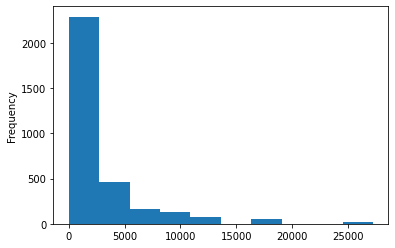

In [150]:
fb_rules.lift.plot(kind='hist')

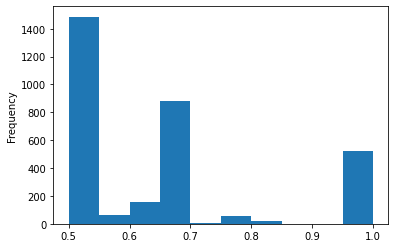

In [151]:
fb_rules.confidence.plot(kind='hist')

In [152]:
fb_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [153]:
fb_rules = fb_rules[['antecedents','consequents','confidence']]
fb_rules.antecedents  = fb_rules.antecedents.apply(lambda x:list(x)[0]).astype("unicode")
fb_rules.consequents  = fb_rules.consequents.apply(lambda x:list(x)[0]).astype("unicode")

In [154]:
#lift and right tabel 
fb_rules

,antecedents,consequents,confidence
0,HBV00000PV7JF,HBV00000TIRU5,0.666667
1,HBV00000NG8FM,HBV00000U27H6,0.500000
2,ZYGIM21035,HBV00000NG8FM,0.600000
3,HBV00000TDWF9,HBV00000O2S62,0.750000
4,HBV00000TDWF9,HBV00000TDWFG,0.500000
...,...,...,...
3184,HBV00000U2B97,HBV00000PV8IF,1.000000
3185,HBV00000PV8IF,HBV00000U2B97,1.000000
3186,HBV0000097EJO,ZYBENC336876,1.000000
3187,HBV00000PVQBT,HRTEK3TEKIS604,1.000000


In [155]:
#merging 
fb_merged = fb_rules.merge(meta,left_on='antecedents',right_on='productid',suffixes=(None,"_left"))
fb_merged = fb_merged.merge(meta,left_on='consequents',right_on='productid',suffixes=(None,"_right"))

fb_merged

,antecedents,consequents,confidence,productid,brand,category,subcategory,name,productid_right,brand_right,category_right,subcategory_right,name_right
0,HBV00000PV7JF,HBV00000TIRU5,0.666667,HBV00000PV7JF,Febreze,"Spor, Outdoor ve Oto",Oto Ürünleri,Bahar Çiçekleri Araba Kokusu 2 ml,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
1,SGLEPETIT4305,HBV00000TIRU5,0.666667,SGLEPETIT4305,Le Petit Marseillais,Kişisel Bakım,Duş Jelleri ve Sabunlar,Le Petit Marseillais Duş Jeli Şeftali ve Nekta...,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
2,HBV00000O2SIV,HBV00000TIRU5,0.500000,HBV00000O2SIV,None,Meyve ve Sebze,Meyve,Mango Gurme Yemeğe Hazır Adet,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
3,HBV00000PV8Y0,HBV00000TIRU5,0.500000,HBV00000PV8Y0,Knorr,Pratik Yemekler,Hazır Çorbalar,Knorr Terbiyeli Tavuk Çorba 62 g,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
4,HBV00000NFHPD,HBV00000TIRU5,0.500000,HBV00000NFHPD,Exotic,İçecekler,Meyve Suyu,Exotic Portakal Suyu 330 ml,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,HBV00000U2B97,HBV00000PV8IF,1.000000,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g
3185,HBV00000PV8IF,HBV00000U2B97,1.000000,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...
3186,HBV0000097EJO,ZYBENC336876,1.000000,HBV0000097EJO,Mr. Muscle,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Mr Muscle Promo Mutfak Temizleyici Limon 750 m...,ZYBENC336876,Marc,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Marc Banyo ve Mutfak Temizleyici Yağ Çözücü & ...
3187,HBV00000PVQBT,HRTEK3TEKIS604,1.000000,HBV00000PVQBT,Tekis,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Golyat Üçlü Fiş,HRTEK3TEKIS604,TEK-İŞ,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Tek-İş - Klasik Üçlü Fiş


In [156]:
features_list = list(fb_merged.columns)
features_list.remove('confidence')

In [157]:
features = fb_merged[features_list]
features

,antecedents,consequents,productid,brand,category,subcategory,name,productid_right,brand_right,category_right,subcategory_right,name_right
0,HBV00000PV7JF,HBV00000TIRU5,HBV00000PV7JF,Febreze,"Spor, Outdoor ve Oto",Oto Ürünleri,Bahar Çiçekleri Araba Kokusu 2 ml,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
1,SGLEPETIT4305,HBV00000TIRU5,SGLEPETIT4305,Le Petit Marseillais,Kişisel Bakım,Duş Jelleri ve Sabunlar,Le Petit Marseillais Duş Jeli Şeftali ve Nekta...,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
2,HBV00000O2SIV,HBV00000TIRU5,HBV00000O2SIV,None,Meyve ve Sebze,Meyve,Mango Gurme Yemeğe Hazır Adet,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
3,HBV00000PV8Y0,HBV00000TIRU5,HBV00000PV8Y0,Knorr,Pratik Yemekler,Hazır Çorbalar,Knorr Terbiyeli Tavuk Çorba 62 g,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
4,HBV00000NFHPD,HBV00000TIRU5,HBV00000NFHPD,Exotic,İçecekler,Meyve Suyu,Exotic Portakal Suyu 330 ml,HBV00000TIRU5,None,Meyve ve Sebze,Meyve,Nektarin Paket 500 gr
...,...,...,...,...,...,...,...,...,...,...,...,...
3184,HBV00000U2B97,HBV00000PV8IF,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g
3185,HBV00000PV8IF,HBV00000U2B97,HBV00000PV8IF,Hipp,Bebek,Biberon Mamaları,Hipp Organik Sütlü Meyveli Ek Gıda 250 g,HBV00000U2B97,Hipp,Bebek,Biberon Mamaları,Hipp Organik Yoğurtlu Meyveli Tahıl Bazlı Ek g...
3186,HBV0000097EJO,ZYBENC336876,HBV0000097EJO,Mr. Muscle,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Mr Muscle Promo Mutfak Temizleyici Limon 750 m...,ZYBENC336876,Marc,Ev Bakım ve Temizlik,Mutfak Ve Banyo Ürünleri,Marc Banyo ve Mutfak Temizleyici Yağ Çözücü & ...
3187,HBV00000PVQBT,HRTEK3TEKIS604,HBV00000PVQBT,Tekis,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Golyat Üçlü Fiş,HRTEK3TEKIS604,TEK-İŞ,Ev Yaşam ve Bahçe,"Hırdavat, Kablo ve Aksesuarlar",Tek-İş - Klasik Üçlü Fiş


In [158]:
fb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 3188
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   antecedents        3189 non-null   object 
 1   consequents        3189 non-null   object 
 2   confidence         3189 non-null   float64
 3   productid          3189 non-null   object 
 4   brand              3058 non-null   object 
 5   category           3189 non-null   object 
 6   subcategory        3189 non-null   object 
 7   name               3189 non-null   object 
 8   productid_right    3189 non-null   object 
 9   brand_right        2498 non-null   object 
 10  category_right     3189 non-null   object 
 11  subcategory_right  3189 non-null   object 
 12  name_right         3189 non-null   object 
dtypes: float64(1), object(12)
memory usage: 348.8+ KB


In [159]:
fb_merged.values[0]

array(['HBV00000PV7JF', 'HBV00000TIRU5', 0.6666666666666666,
       'HBV00000PV7JF', 'Febreze', 'Spor, Outdoor ve Oto', 'Oto Ürünleri',
       'Bahar Çiçekleri Araba Kokusu 2 ml', 'HBV00000TIRU5', None,
       'Meyve ve Sebze', 'Meyve', 'Nektarin Paket 500 gr'], dtype=object)

In [160]:
' '.join(features.values[100])

TypeError: ignored

In [ ]:
features.values

In [ ]:
#vectorizing using tfidf
corpus_list = []
for seq in features.values:
  try:
    x = ' '.join(seq)
  except :
    pass 
  corpus_list.append(x)

In [ ]:
#split test and training 
test_size = .2 
train_features = corpus_list[:int(len(corpus_list)*(1-test_size))]
train_labels = fb_merged.confidence.values[:int(len(corpus_list)*(1-test_size))]

In [ ]:
len(train_features) - len(train_labels)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X= vectorizer.fit_transform(train_features)

In [ ]:
X

In [ ]:
len(vectorizer.get_feature_names())

In [ ]:
encoded = vectorizer.transform(corpus_list[0].split())

In [ ]:
decoded= vectorizer.inverse_transform(encoded)

In [ ]:
for x in decoded:
  print(x)

In [ ]:
train_features = [vectorizer.transform(train_features)]

In [ ]:
X

In [ ]:
train_labels[0]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(350)
X = pca.fit_transform(X)
regressor = RandomForestRegressor()

In [ ]:
import numpy as np
sum(pca.explained_variance_ratio_)

In [ ]:
X[0]

In [ ]:
regressor.fit(X, train_labels)

In [ ]:
features_test = corpus_list[len(X):]
features_test = vectorizer.transform(features_test)
features_test = pca.transform(features_test)
labels_test = fb_merged.confidence.values[len(X):]
prediction = regressor.predict(features_test)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(labels_test, prediction, squared=False)

In [ ]:
rmse